来源于官方资料：[十分钟入门pandas](https://www.pypandas.cn/docs/getting_started/10min.html#%E7%94%9F%E6%88%90%E5%AF%B9%E8%B1%A1)

## 1. 创建数据集 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 用值列表生成Serises，默认自动生成整数索引
s = pd.Series([1, 2, 3, np.nan, 4])
print(s)

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
dtype: float64


In [3]:
dates = pd.date_range('20210220', periods=6)
print(dates)

DatetimeIndex(['2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25'],
              dtype='datetime64[ns]', freq='D')


In [4]:
# 使用上述的时间索引生成数据集
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [5]:
# 使用Series字典对象生成数据集
df2 = pd.DataFrame({'A': 1.,
   ...:                     'B': pd.Timestamp('20130102'),
   ...:                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   ...:                     'D': np.array([3] * 4, dtype='int32'),
   ...:                     'E': pd.Categorical(["test", "train", "test", "train"]),
   ...:                     'F': 'foo'})
   ...:
print(df2)

SyntaxError: invalid syntax (<ipython-input-5-ac030141e94c>, line 3)

In [9]:
# 查看不同属性列的类型
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 2. 查看对象

In [10]:
df.head()

,A,B,C,D
2021-02-20,-0.575321,0.641131,0.277875,0.167075
2021-02-21,-1.188967,0.516794,0.284324,-0.308114
2021-02-22,-0.245231,-0.242355,-2.834809,-0.026509
2021-02-23,-1.421828,-0.474671,0.953416,-0.907602
2021-02-24,-0.640503,-0.712421,-1.224029,1.860798


In [12]:
df.tail()

,A,B,C,D
2021-02-21,-1.188967,0.516794,0.284324,-0.308114
2021-02-22,-0.245231,-0.242355,-2.834809,-0.026509
2021-02-23,-1.421828,-0.474671,0.953416,-0.907602
2021-02-24,-0.640503,-0.712421,-1.224029,1.860798
2021-02-25,0.815809,0.702502,-1.608049,1.129848


In [13]:
df.index

DatetimeIndex(['2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
# 查找支持numpy的对象
df.to_numpy()
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.542674,0.071830,-0.691878,0.319249
std,0.791857,0.621654,1.436321,1.007462
min,-1.421828,-0.712421,-2.834809,-0.907602
25%,-1.051851,-0.416592,-1.512044,-0.237713
50%,-0.607912,0.137219,-0.473077,0.070283
75%,-0.327754,0.610046,0.282712,0.889155
max,0.815809,0.702502,0.953416,1.860798


In [21]:
# 按照轴进行排列
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2021-02-20,0.167075,0.277875,0.641131,-0.575321
2021-02-21,-0.308114,0.284324,0.516794,-1.188967
2021-02-22,-0.026509,-2.834809,-0.242355,-0.245231
2021-02-23,-0.907602,0.953416,-0.474671,-1.421828
2021-02-24,1.860798,-1.224029,-0.712421,-0.640503
2021-02-25,1.129848,-1.608049,0.702502,0.815809


In [22]:
# 按照值进行排列
df.sort_values(by='B', ascending=False)

,A,B,C,D
2021-02-25,0.815809,0.702502,-1.608049,1.129848
2021-02-20,-0.575321,0.641131,0.277875,0.167075
2021-02-21,-1.188967,0.516794,0.284324,-0.308114
2021-02-22,-0.245231,-0.242355,-2.834809,-0.026509
2021-02-23,-1.421828,-0.474671,0.953416,-0.907602
2021-02-24,-0.640503,-0.712421,-1.224029,1.860798


## 3. 选择 

In [23]:
# 选择单列数据
df['A']

2021-02-20   -0.575321
2021-02-21   -1.188967
2021-02-22   -0.245231
2021-02-23   -1.421828
2021-02-24   -0.640503
2021-02-25    0.815809
Freq: D, Name: A, dtype: float64

In [25]:
# 使用[]进行切片
df[0:3]
df['20210220':'20210223']

,A,B,C,D
2021-02-20,-0.575321,0.641131,0.277875,0.167075
2021-02-21,-1.188967,0.516794,0.284324,-0.308114
2021-02-22,-0.245231,-0.242355,-2.834809,-0.026509
2021-02-23,-1.421828,-0.474671,0.953416,-0.907602


### 3.2 按标签访问

In [26]:
# 使用标签返回一行数据
df.loc[dates[0]]

A   -0.575321
B    0.641131
C    0.277875
D    0.167075
Name: 2021-02-20 00:00:00, dtype: float64

In [28]:
# 用标签选择多列多行数据
df.loc['20210220':'20210223', ['A','B']]

,A,B
2021-02-20,-0.575321,0.641131
2021-02-21,-1.188967,0.516794
2021-02-22,-0.245231,-0.242355
2021-02-23,-1.421828,-0.474671


In [30]:
# 提取标量值
df.loc[dates[0], 'A']

-0.5753212092336925

### 3.3 按照位置选择


In [31]:
# 类似于numpy切片
df.iloc[3:5, 1:3]

,B,C
2021-02-23,-0.474671,0.953416
2021-02-24,-0.712421,-1.224029


In [32]:
# 访问标量
df.iloc[1,1]

0.5167938669172373

### 3.4 bool索引

In [33]:
df[df.B > 0]

,A,B,C,D
2021-02-20,-0.575321,0.641131,0.277875,0.167075
2021-02-21,-1.188967,0.516794,0.284324,-0.308114
2021-02-25,0.815809,0.702502,-1.608049,1.129848


In [34]:
# 选择整个数据集中满足条件的数据
df[df > 0]

,A,B,C,D
2021-02-20,NaN,0.641131,0.277875,0.167075
2021-02-21,NaN,0.516794,0.284324,NaN
2021-02-22,NaN,NaN,NaN,NaN
2021-02-23,NaN,NaN,0.953416,NaN
2021-02-24,NaN,NaN,NaN,1.860798
2021-02-25,0.815809,0.702502,NaN,1.129848


In [38]:
# 使用isin进行筛选
df3 = df.copy()
df3['E'] = ['one', 'two', 'three', 'four', 'five', 'six']
df3[df3['E'].isin(['two', 'three'])]

,A,B,C,D,E
2021-02-21,-1.188967,0.516794,0.284324,-0.308114,two
2021-02-22,-0.245231,-0.242355,-2.834809,-0.026509,three


### 3.5 赋值

In [47]:
# 用索引自动对齐
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20210220', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2021-02-20,-0.575321,0.641131,0.277875,0.167075,1
2021-02-21,-1.188967,0.516794,0.284324,-0.308114,2
2021-02-22,-0.245231,-0.242355,-2.834809,-0.026509,3
2021-02-23,-1.421828,-0.474671,0.953416,-0.907602,4
2021-02-24,-0.640503,-0.712421,-1.224029,1.860798,5
2021-02-25,0.815809,0.702502,-1.608049,1.129848,6


In [49]:
df.loc[:, 'D'] = np.array([5]*len(df))
df

,A,B,C,D,F
2021-02-20,-0.575321,0.641131,0.277875,5,1
2021-02-21,-1.188967,0.516794,0.284324,5,2
2021-02-22,-0.245231,-0.242355,-2.834809,5,3
2021-02-23,-1.421828,-0.474671,0.953416,5,4
2021-02-24,-0.640503,-0.712421,-1.224029,5,5
2021-02-25,0.815809,0.702502,-1.608049,5,6


In [6]:
len(df)

6

## 4. 缺失值

In [56]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2021-02-20,-0.575321,0.641131,0.277875,5,1,1.0
2021-02-21,-1.188967,0.516794,0.284324,5,2,1.0
2021-02-22,-0.245231,-0.242355,-2.834809,5,3,NaN
2021-02-23,-1.421828,-0.474671,0.953416,5,4,NaN


In [57]:
# 删除缺失数据行
df1.dropna(how='any')

,A,B,C,D,F,E
2021-02-20,-0.575321,0.641131,0.277875,5,1,1.0
2021-02-21,-1.188967,0.516794,0.284324,5,2,1.0


In [58]:
# 填充
df1.fillna(value=5)

,A,B,C,D,F,E
2021-02-20,-0.575321,0.641131,0.277875,5,1,1.0
2021-02-21,-1.188967,0.516794,0.284324,5,2,1.0
2021-02-22,-0.245231,-0.242355,-2.834809,5,3,5.0
2021-02-23,-1.421828,-0.474671,0.953416,5,4,5.0


## 5. 运算

### 5.1 统计

In [60]:
df['B'].mean()

0.07182990458251581

In [61]:
# 在行上求平均值
df.mean(1)

2021-02-20    1.268737
2021-02-21    1.322430
2021-02-22    0.935521
2021-02-23    1.611383
2021-02-24    1.484609
2021-02-25    2.182052
Freq: D, dtype: float64

## 6. 合并
### 6.1 结合

In [7]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.547341,-2.082929,-0.190950,-0.327501
1,-1.336805,1.148632,-0.703326,-1.178525
2,-1.114126,-1.051393,2.150010,-1.909319
3,-0.838999,-0.167628,-0.095623,-1.230762
4,0.300337,-0.803076,-1.305823,0.565151
5,-0.160864,2.044033,-0.973718,-1.314739
6,1.039741,0.924924,-0.246127,-1.589007
7,-0.702157,-0.888025,-0.041296,0.184977
8,0.058471,-0.833152,-1.551953,0.679490
9,-0.521986,0.819052,-2.624007,0.340274


In [14]:
# 切片
pieces = [df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.547341 -2.082929 -0.190950 -0.327501
 1 -1.336805  1.148632 -0.703326 -1.178525
 2 -1.114126 -1.051393  2.150010 -1.909319,
           0         1         2         3
 3 -0.838999 -0.167628 -0.095623 -1.230762
 4  0.300337 -0.803076 -1.305823  0.565151
 5 -0.160864  2.044033 -0.973718 -1.314739
 6  1.039741  0.924924 -0.246127 -1.589007,
           0         1         2         3
 7 -0.702157 -0.888025 -0.041296  0.184977
 8  0.058471 -0.833152 -1.551953  0.679490
 9 -0.521986  0.819052 -2.624007  0.340274]

In [15]:
pd.concat(pieces)

,0,1,2,3
0,-0.547341,-2.082929,-0.190950,-0.327501
1,-1.336805,1.148632,-0.703326,-1.178525
2,-1.114126,-1.051393,2.150010,-1.909319
3,-0.838999,-0.167628,-0.095623,-1.230762
4,0.300337,-0.803076,-1.305823,0.565151
5,-0.160864,2.044033,-0.973718,-1.314739
6,1.039741,0.924924,-0.246127,-1.589007
7,-0.702157,-0.888025,-0.041296,0.184977
8,0.058471,-0.833152,-1.551953,0.679490
9,-0.521986,0.819052,-2.624007,0.340274


### 6.2 连接  

In [18]:
left = pd.DataFrame({'key':['foo', 'foo'], 'value':[1,2]})
right = pd.DataFrame({'key':['foo','foo'], 'value':[4,5]})
# 注意大括号的位置

In [20]:
pd.merge(left, right, on='key')

,key,value_x,value_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### 6.3 追加

In [21]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.682536,1.500781,-0.565660,1.050876
1,-0.348679,-0.434257,-0.103393,-0.625979
2,0.343289,-0.534163,1.064812,-0.425040
3,-0.606479,-0.726873,-0.985852,-0.882931
4,-2.016893,0.301592,0.183905,0.075363
5,0.574745,-0.352458,-0.118133,-0.971813
6,-1.170900,1.239958,-0.904074,1.047417
7,-0.788442,-0.777061,1.103504,0.705338


In [22]:
s = df.iloc[3]

In [23]:
df.append(s, ignore_index=True)
df

,A,B,C,D
0,0.682536,1.500781,-0.565660,1.050876
1,-0.348679,-0.434257,-0.103393,-0.625979
2,0.343289,-0.534163,1.064812,-0.425040
3,-0.606479,-0.726873,-0.985852,-0.882931
4,-2.016893,0.301592,0.183905,0.075363
5,0.574745,-0.352458,-0.118133,-0.971813
6,-1.170900,1.239958,-0.904074,1.047417
7,-0.788442,-0.777061,1.103504,0.705338


## 7. 分组

In [25]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B': ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C': np.random.randn(8),
   ....:                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.559045,-0.049456
1,bar,one,0.681586,-0.550256
2,foo,two,-1.434285,-0.785119
3,bar,three,-2.032419,-0.318699
4,foo,two,-0.330845,-0.448533
5,bar,two,0.646538,0.682775
6,foo,one,-0.012243,1.444787
7,foo,three,0.556337,1.417032


In [27]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.704295,-0.186180
foo,-0.661990,1.578711


In [29]:
# 多层索引
df.groupby(['A','B']).sum()
# 注意中括号

C         D
A   B                        
bar one    0.681586 -0.550256
    three -2.032419 -0.318699
    two    0.646538  0.682775
foo one    0.546802  1.395331
    three  0.556337  1.417032
    two   -1.765130 -1.233651

## 8. 重塑 

In [36]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 
tuples
# zip用法如下
# >>>a = [1,2,3]
# >>> b = [4,5,6]
# >>> c = [4,5,6,7,8]
# >>> zipped = zip(a,b)     # 打包为元组的列表
# [(1, 4), (2, 5), (3, 6)]

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [37]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [38]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.266617 -2.198648
      two     0.291429 -0.749912
baz   one     1.551538  0.306367
      two     0.149924 -1.410553
foo   one    -1.186484  1.318467
      two     1.017068  0.457525
qux   one    -0.007335  0.299786
      two    -0.079791 -0.240426

In [40]:
# stack压缩
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.266617
               B   -2.198648
       two     A    0.291429
               B   -0.749912
baz    one     A    1.551538
               B    0.306367
       two     A    0.149924
               B   -1.410553
foo    one     A   -1.186484
               B    1.318467
       two     A    1.017068
               B    0.457525
qux    one     A   -0.007335
               B    0.299786
       two     A   -0.079791
               B   -0.240426
dtype: float64

In [41]:
# 压缩后具有多层索引
# 默认还原最后一列
stacked.unstack()

A         B
first second                    
bar   one    -0.266617 -2.198648
      two     0.291429 -0.749912
baz   one     1.551538  0.306367
      two     0.149924 -1.410553
foo   one    -1.186484  1.318467
      two     1.017068  0.457525
qux   one    -0.007335  0.299786
      two    -0.079791 -0.240426

## 9. 数据透视表

In [43]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B': ['A', 'B', 'C'] * 4,
   .....:                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D': np.random.randn(12),
   .....:                    'E': np.random.randn(12)})
   .....:
df

,A,B,C,D,E
0,one,A,foo,1.689671,-0.698901
1,one,B,foo,-0.990147,1.670040
2,two,C,foo,1.779018,-1.289200
3,three,A,bar,-1.012070,1.257548
4,one,B,bar,2.928475,0.029098
5,one,C,bar,1.272499,-0.592279
6,two,A,foo,1.209681,-1.252153
7,three,B,foo,-0.587989,1.174857
8,one,C,foo,-1.235629,1.915401
9,one,A,bar,-1.043050,0.928881


In [44]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.043050  1.689671
      B  2.928475 -0.990147
      C  1.272499 -1.235629
three A -1.012070       NaN
      B       NaN -0.587989
      C  0.467063       NaN
two   A       NaN  1.209681
      B  1.711671       NaN
      C       NaN  1.779018

## 10. 可视化

<Figure size 432x288 with 0 Axes>

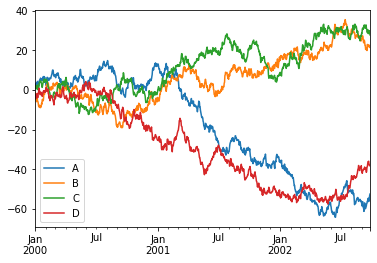

In [53]:
ts = pd.DataFrame(np.random.randn(1000, 4),
   .....:                index=pd.date_range('1/1/2000', periods=1000), columns=['A', 'B', 'C', 'D'])
   .....: 
ts = ts.cumsum() 
# 计算累计和
plt.figure()
ts.plot()
plt.legend(loc='best')

## 11. 数据读入/读出

In [57]:
df = pd.read_csv('dataset\housing.csv')

In [58]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
